Aufgabe 31.

Der Datensatz Sauerstoff enthält von 31 Testpersonen folgende Daten: Name, Geschlecht, Alter, Gewicht sowie Laufzeit, Laufpuls, Ruhepuls und Maximalpuls während eines Fitness-Tests. Zielgröße ist die Sauerstoffversorgung im Blut.

In [24]:
import pandas as pd
from utils import *
from statsmodels.api import OLS, add_constant

In [25]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
healthy_orange = '#EC6602'
healthy_orange_50 = '#F9B591'
healthy_orange_25 = '#FDDDCB'
siemens_petrol = '#009999'
siemens_petrol_50 = '#87D2D2'
sns.set_palette([healthy_orange, siemens_petrol, healthy_orange_50, healthy_orange_25, siemens_petrol_50])
RANDOM_SEED = 42

In [26]:
df = pd.read_csv('../data/Sauerstoff.txt')
df.head()

,Name,Geschlecht,Alter,Gewicht,Sauerstoff,Laufzeit,Laufpuls,Ruhepuls,Maximalpuls
0,Donna,F,42,68.15,59.57,8.17,166,40,172
1,Gracie,F,38,81.87,60.06,8.63,170,48,186
2,Luanne,F,43,85.84,54.30,8.65,156,45,168
3,Mimi,F,50,70.87,54.63,8.92,146,48,155
4,Chris,M,49,81.42,49.16,8.95,180,44,185


In [27]:
df.isna().sum()

Name           0
Geschlecht     0
Alter          0
Gewicht        0
Sauerstoff     0
Laufzeit       0
Laufpuls       0
Ruhepuls       0
Maximalpuls    0
dtype: int64

a) Untersuchen Sie jeweils für die zwei stetigen Variablen Gewicht und Laufzeit, ob diese aus Normalverteilungen stammen könnten.

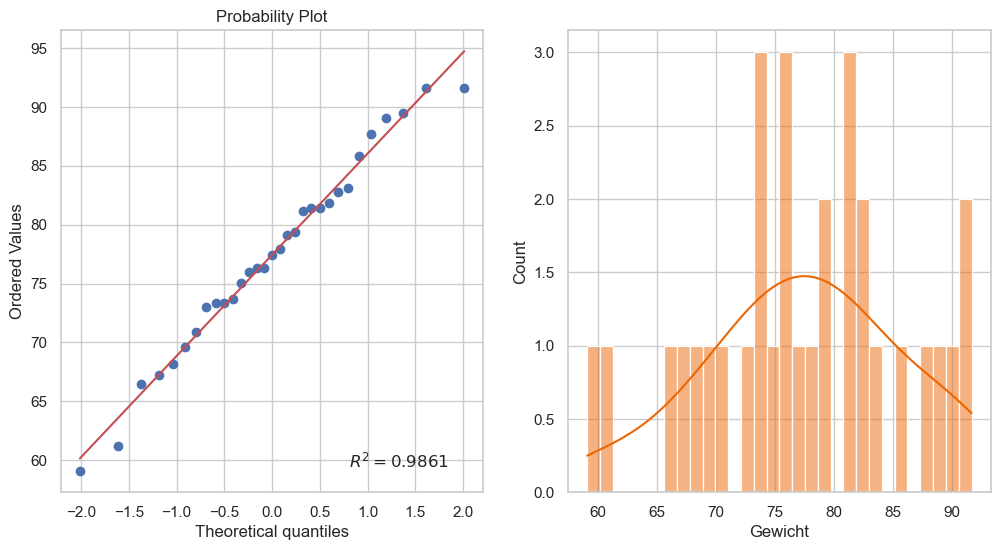

Shapiro-Wilk normality test: p-value = 0.8106476324695011
D'Agostino's K^2 normality test: p-value = 0.8582021940571252
Kolmogorov-Smirnov normality test: p-value = 0.9931848375418509
Anderson-Darling normality test: statistic = 0.1581966816490059, critical value = 0.713


In [28]:
check_normality(df.Gewicht)

`Gewicht` ist normalverteilt.

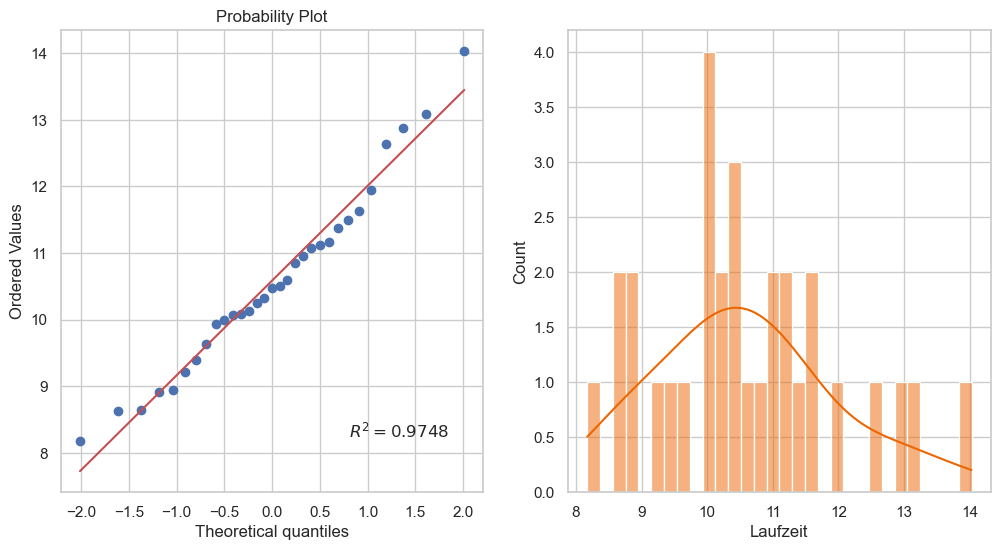

Shapiro-Wilk normality test: p-value = 0.6223368228107964
D'Agostino's K^2 normality test: p-value = 0.41693147788445906
Kolmogorov-Smirnov normality test: p-value = 0.9822056651192581
Anderson-Darling normality test: statistic = 0.26425028371384585, critical value = 0.713


In [29]:
check_normality(df.Laufzeit)

`Laufzeit` ist auch normalverteilt.

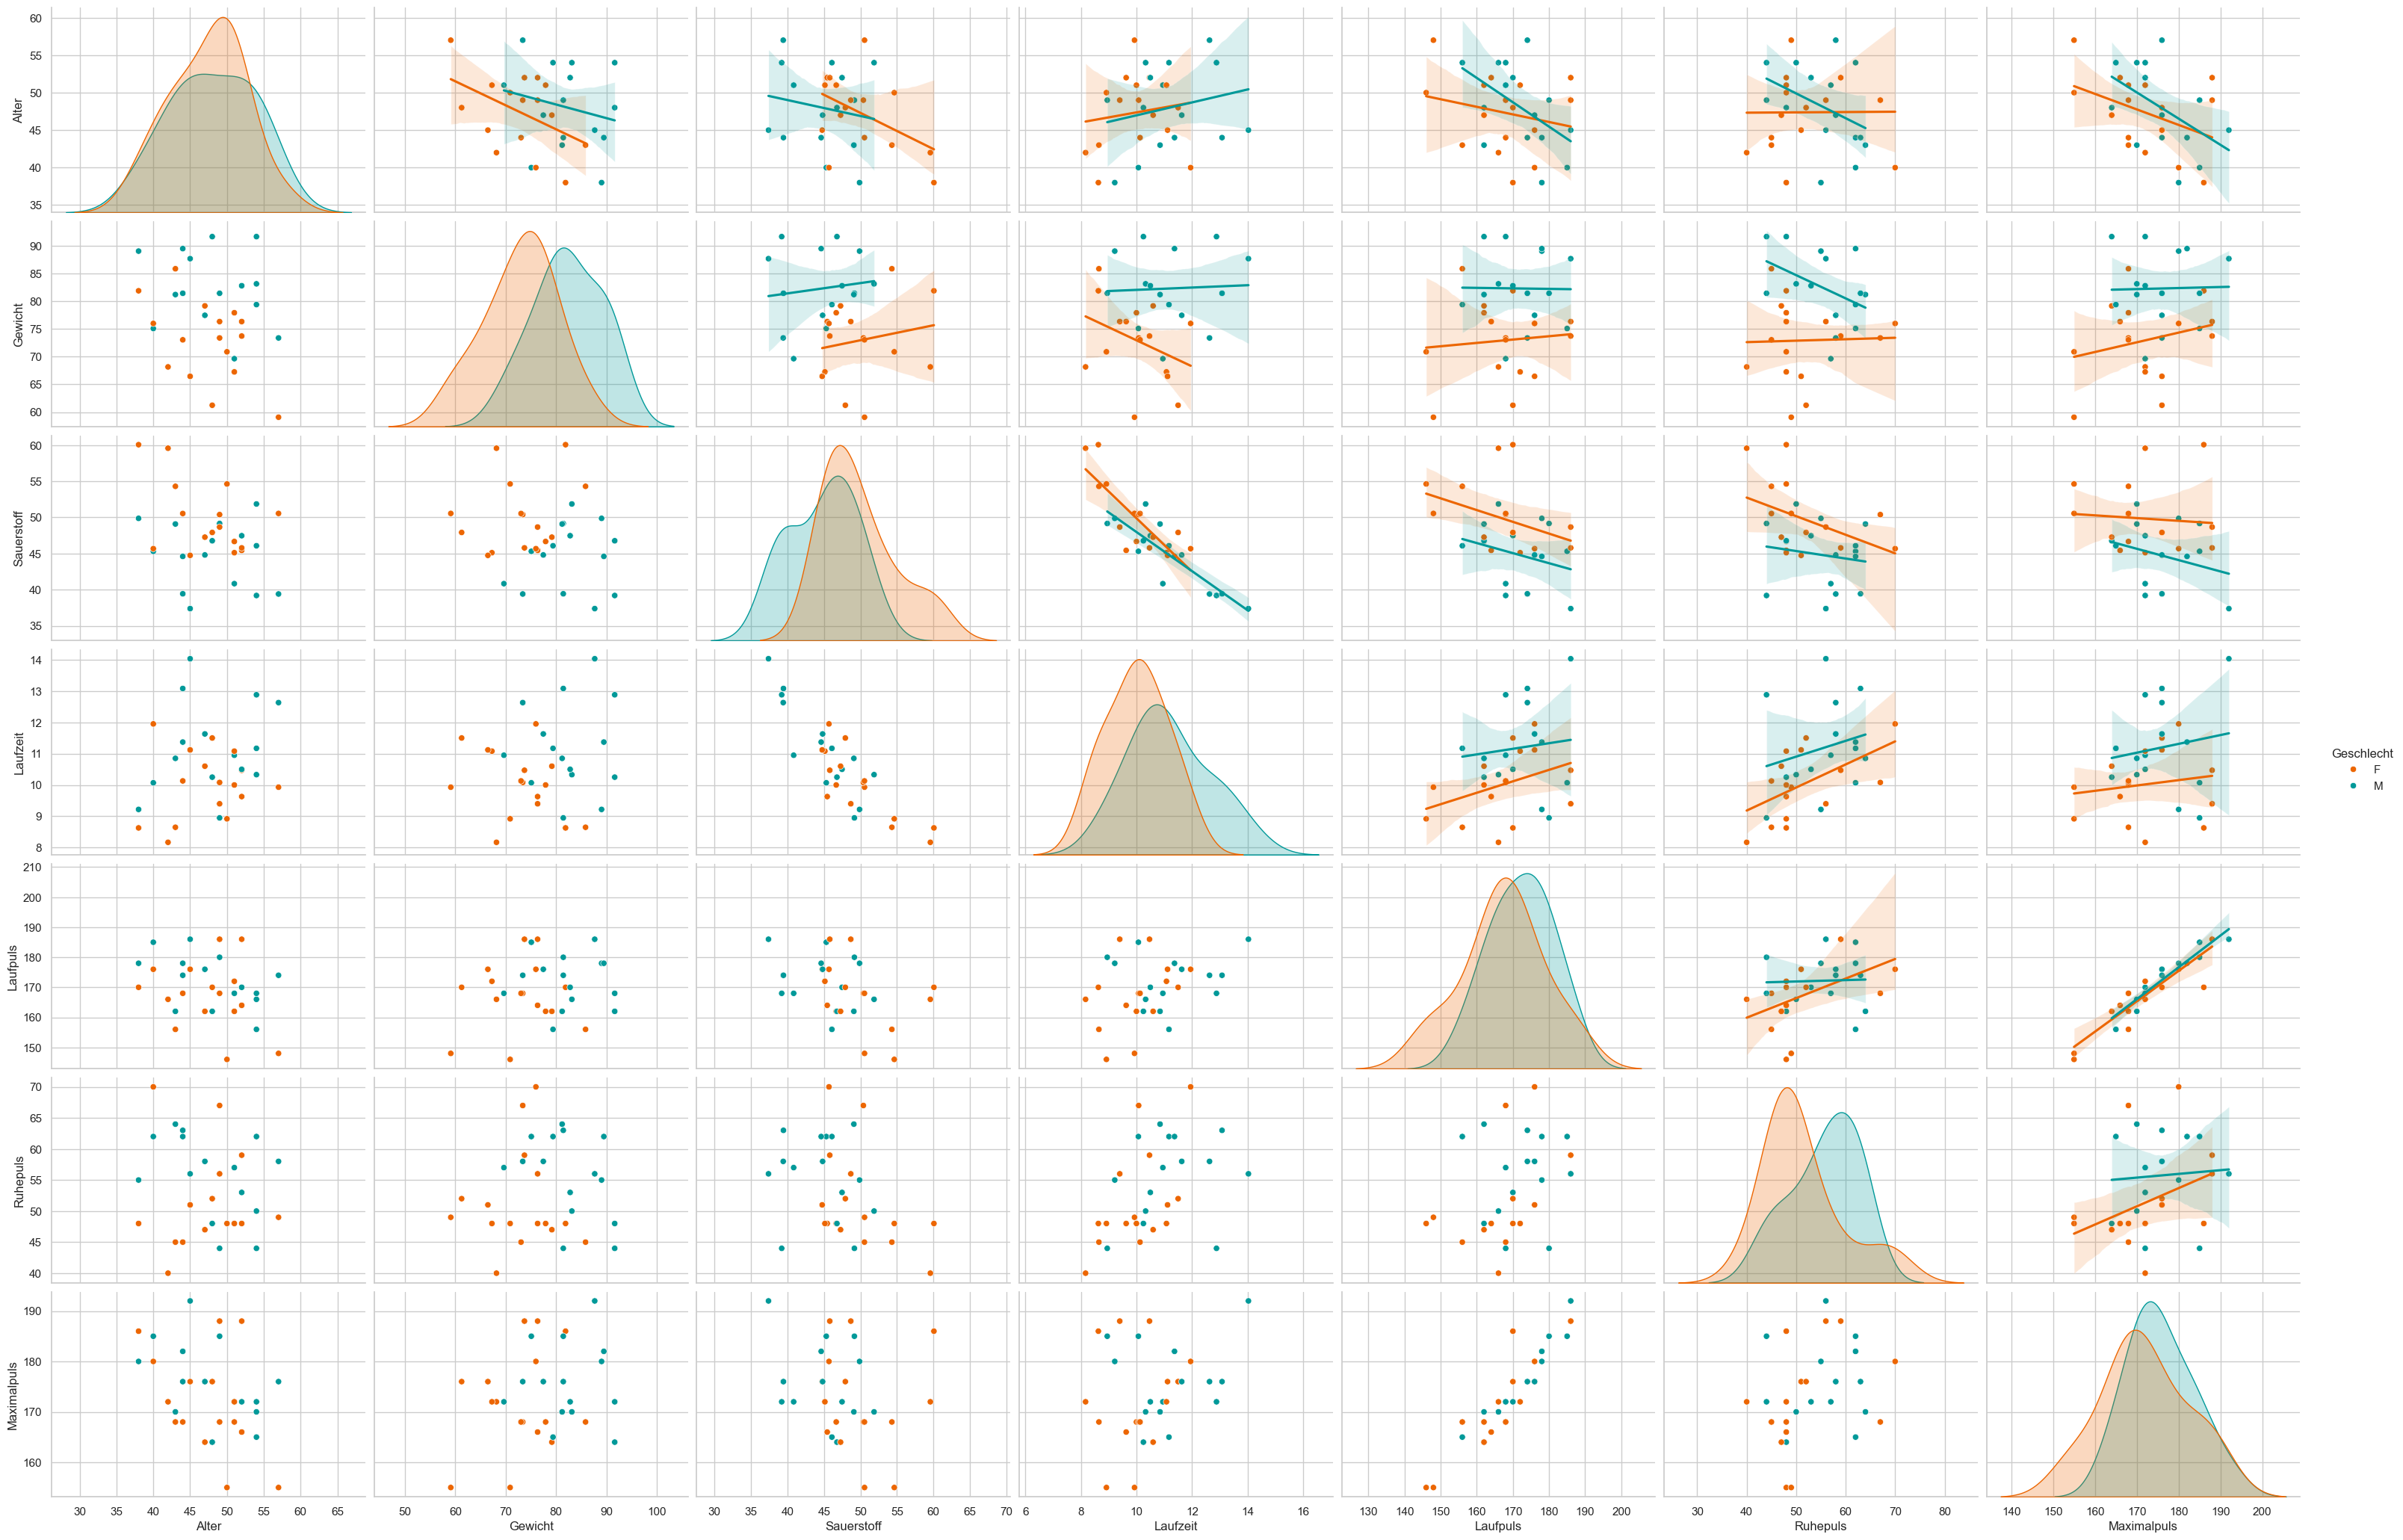

In [30]:
g = sns.pairplot(df, diag_kind='kde', height=3, aspect=1.5, hue='Geschlecht');
g.map_upper(sns.regplot, scatter=False);

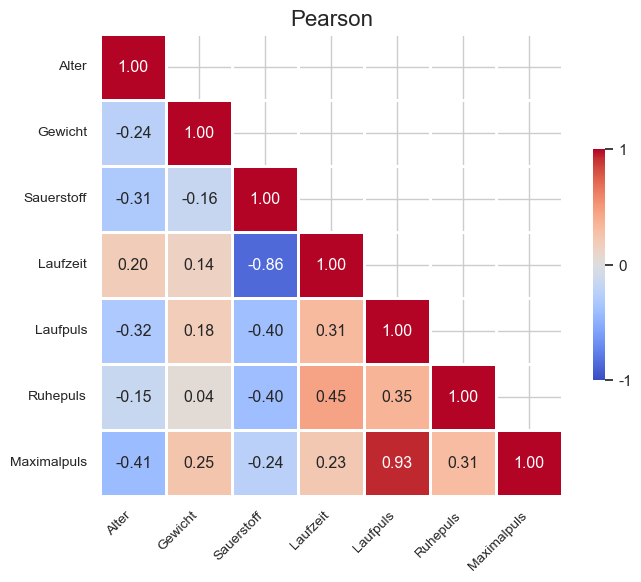

In [31]:
num_corr_heatmap(df.corr(numeric_only=True))

b) Führen Sie eine einfache lineare Regression mit Zielgröße Sauerstoff und Laufzeit als Faktor durch.

In [32]:
X = df.Laufzeit
y = df.Sauerstoff
X = add_constant(X)
model = OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Sauerstoff   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     83.97
Date:                Thu, 01 May 2025   Prob (F-statistic):           4.61e-10
Time:                        20:57:05   Log-Likelihood:                -74.263
No. Observations:                  31   AIC:                             152.5
Df Residuals:                      29   BIC:                             155.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.4257      3.856     21.373      0.0

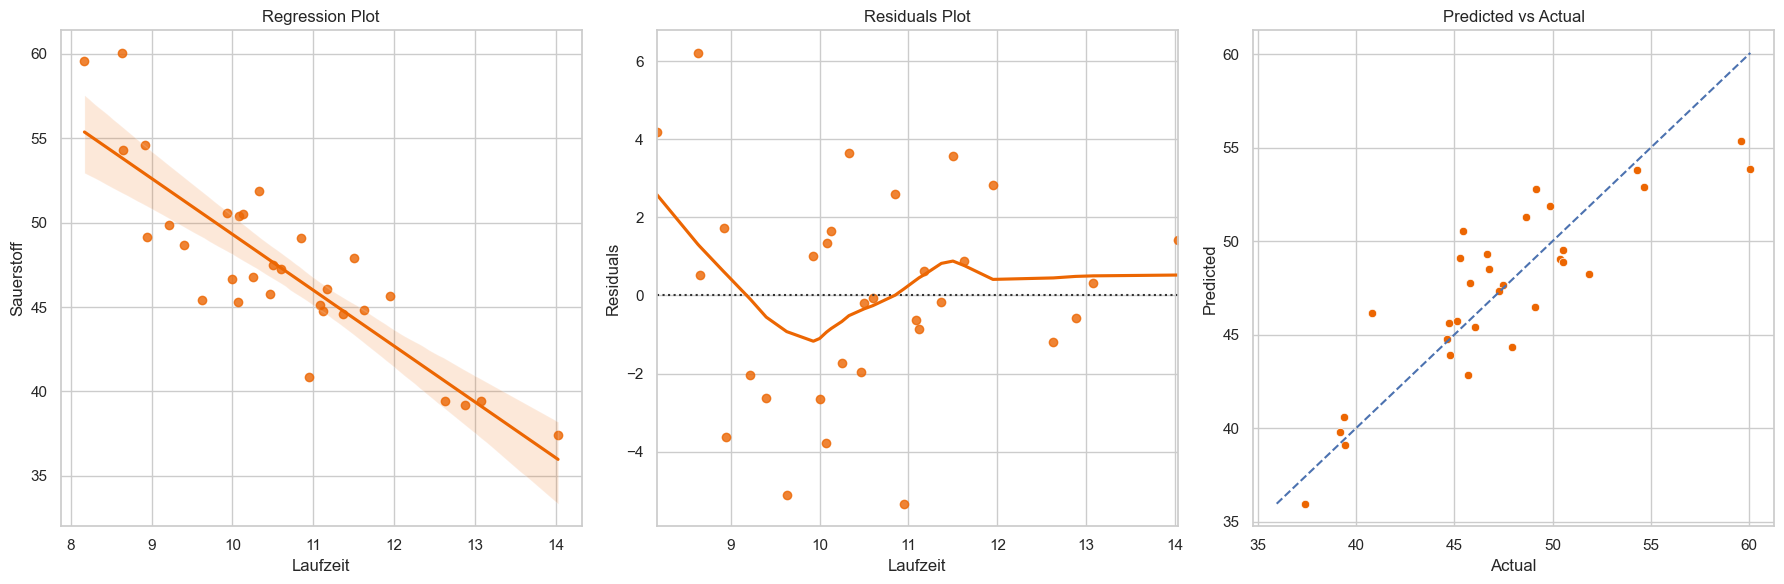

In [33]:
plot_regression_results(df.Laufzeit, df.Sauerstoff, results)

d) Beurteilen Sie die Signifikanz der Modelle jeweils graphisch und statistisch.

Das Modell ist statistisch signifikant mit dem R2 von 0.743, natürlich auch der Prädiktor `Laufzeit` ist signifikant mit P-Wert von 0%, die Residuen sind auch normalverteilt.

c) Führen Sie eine einfache lineare Regression mit Zielgröße Sauerstoff und Gewicht als Faktor durch.

In [34]:
X = df.Gewicht
y = df.Sauerstoff
X = add_constant(X)
model = OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Sauerstoff   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.7899
Date:                Thu, 01 May 2025   Prob (F-statistic):              0.381
Time:                        20:57:05   Log-Likelihood:                -94.925
No. Observations:                  31   AIC:                             193.8
Df Residuals:                      29   BIC:                             196.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.4438      9.128      6.074      0.0

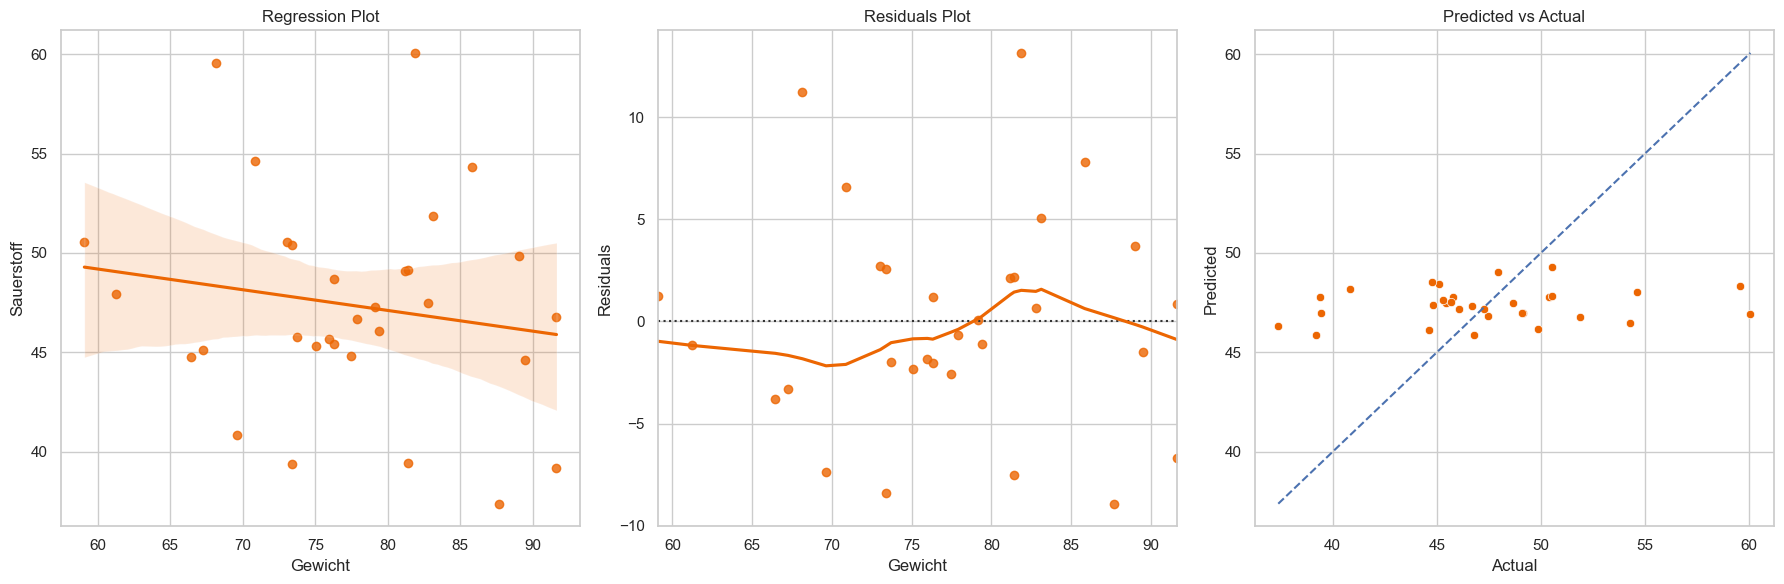

In [35]:
plot_regression_results(df.Gewicht, df.Sauerstoff, results)

Das Modell ist **nicht** statistisch signifikant mit dem R2 von 0.027, auch der Prädiktor `Gewicht` ist **nicht** signifikant mit P-Wert von 38.1%.

e) Führen Sie eine multiple lineare Regression mit Zielgröße Sauerstoff und allen stetigen Größen als Haupteffekte durch (ohne Wechselwirkungen). Wie groß sind R2 und das korrigierte R2?

In [36]:
X = df.drop(columns=['Sauerstoff', 'Name', 'Geschlecht'])
y = df.Sauerstoff
X = add_constant(X)
model = OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Sauerstoff   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     22.21
Date:                Thu, 01 May 2025   Prob (F-statistic):           1.07e-08
Time:                        20:57:05   Log-Likelihood:                -66.205
No. Observations:                  31   AIC:                             146.4
Df Residuals:                      24   BIC:                             156.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         101.9558     12.277      8.305      

R2 ist 0.847 und korrigierte R2 ist 0.809.

f) Reduzieren Sie das Modell, bis sich nur noch (grenzwertig) signifikante Terme im Modell befinden. Wie groß sind R2 und R2 korrigiert jetzt?

`Ruhepuls` mit P-Wert von 0.771 und `Gewicht` mit 0.185 sind nicht signifikant, deswegen sollen wir sie weglassen.

In [37]:
X = df.drop(columns=['Sauerstoff', 'Name', 'Geschlecht', 'Gewicht', 'Ruhepuls'])
y = df.Sauerstoff
X = add_constant(X)
model = OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Sauerstoff   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     32.98
Date:                Thu, 01 May 2025   Prob (F-statistic):           7.73e-10
Time:                        20:57:05   Log-Likelihood:                -67.378
No. Observations:                  31   AIC:                             144.8
Df Residuals:                      26   BIC:                             151.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          97.1649     11.661      8.332      

Jetzt sind `Alter` mit P-Wert von 0.056 und `Maximalpuls` mit 0.053 auch nicht signifikant, deswegen sollen wir sie auch löschen. 

In [38]:
X = df[['Laufzeit', 'Laufpuls']]
y = df.Sauerstoff
X = add_constant(X)
model = OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Sauerstoff   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     44.67
Date:                Thu, 01 May 2025   Prob (F-statistic):           1.94e-09
Time:                        20:57:06   Log-Likelihood:                -73.132
No. Observations:                  31   AIC:                             152.3
Df Residuals:                      28   BIC:                             156.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.1044      8.251     11.284      0.0

Jetzt haben wir nur noch `Laufzeit` und `Laufpuls` übrig, die beide sigfikant sind und ein R2 von 0.761 und ein korrigiertes R2 von 0.744 haben.

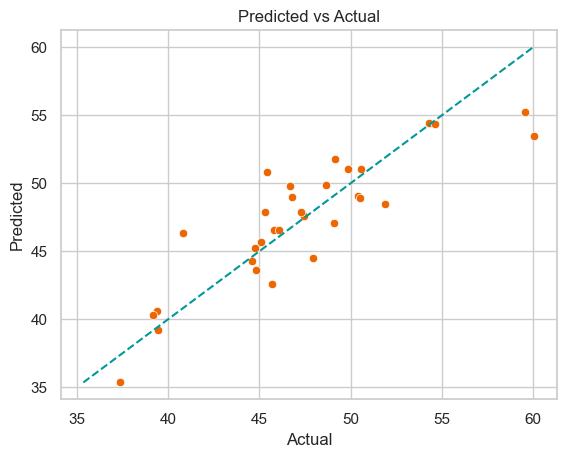

In [39]:
y_pred = results.predict(X)
sns.scatterplot(x=y, y=y_pred)
lims = [min(y.min(), y_pred.min()), max(y.max(), y_pred.max())]
plt.plot(lims, lims, '--', color=siemens_petrol)
plt.title("Predicted vs Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

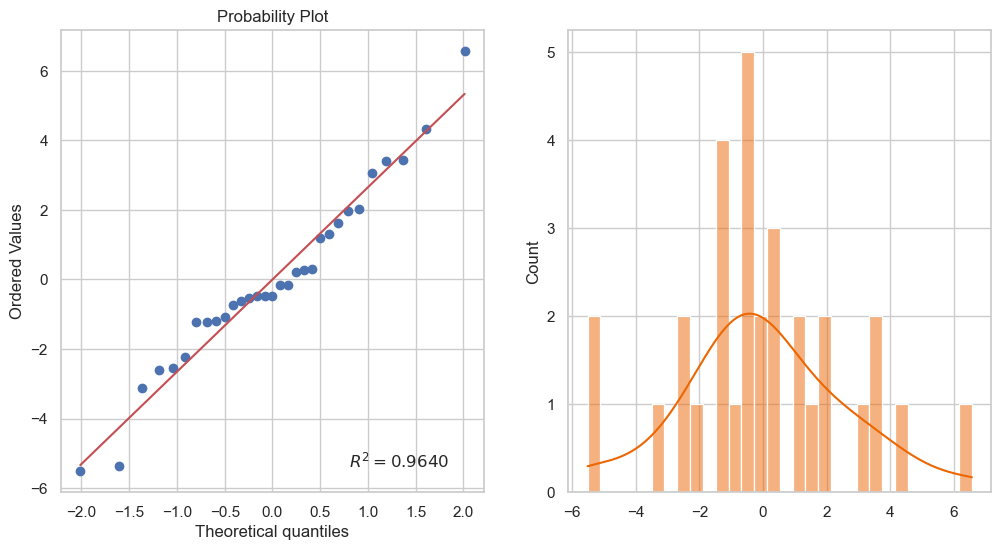

Shapiro-Wilk normality test: p-value = 0.5488509673373299
D'Agostino's K^2 normality test: p-value = 0.5205948358415818
Kolmogorov-Smirnov normality test: p-value = 0.6250931465380948
Anderson-Darling normality test: statistic = 0.43326620827592066, critical value = 0.713


In [40]:
check_normality(results.resid)

g) Auf Ihrem Modell aufbauend, welche Veränderung der Sauerstoffversorgung erwarten Sie, wenn der Laufpuls um 10 Einheiten sinkt und gleichzeitig der Maximalpuls um 10 Einheiten steigt?

In meinem finalen Modell habe ich ja keinen Maximalpuls mehr, da er nicht signifikant war, aber wenn ich mein vorletztes Modell anschaue, dann würde ich es so interpretieren: Wenn Laufpuls 10 Einheiten sinkt, dann steigt der Sauerstoff um 3.1403 * 10 = 31.4 (weil der Koeffizient -3.1403 ist) und wenn der Maximalpuls um 10 steigt, dann steigt der Sauerstoff um 0.2719 * 10 = 2.719 (da der Koeffizient 0.2719 ist). D.h. wenn der Laufpuls um 10 Einheiten sinkt und gleichzeitig der Maximalpuls um 10 Einheiten steigt (und die anderen Variablen konstant bleiben), steigt der Sauerstoff laut dem Modell um etwa 34.12 Einheiten.

**Frage:** In einer multiplen linearen Regression entfernt man oft Variablen mit einem p-Wert ≥ 0,05, um das Modell robuster zu machen. In meinem Beispiel hatte das Modell mit allen vier Variablen ein R2 von 0,835 und ein korrigiertes R2 von 0,810. Nach dem Entfernen der nicht signifikanten Variablen blieben nur noch zwei Variablen übrig, und das Modell hatte ein R² von 0,761 und ein korrigiertes R2 von 0,744. Welches Modell sollte man in so einem Fall wählen: das mit den höheren R2-Werten oder das mit weniger, aber signifikanten Variablen?

**Frage:** Wie sollen wir mit Variablen umgehen, die miteinander korreliert sind?